In [1]:
# Import all the required packages first

import pandas as pd
import numpy as np
from numpy.random import randn
from pandas import Series,DataFrame

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Import our modified data

train_plus = pd.read_csv('train_plus.csv')

In [3]:
#Check the data

train_plus.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_was_missing
0,0,0,3,male,22.0,1,0,S,False
1,1,1,1,female,38.0,1,0,C,False
2,2,1,3,female,26.0,0,0,S,False
3,3,1,1,female,35.0,1,0,S,False
4,4,0,3,male,35.0,0,0,S,False


In [4]:
# There seems to be an extra row which we will delete

train_plus.drop('Unnamed: 0',axis=1,inplace=True)

train_plus.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_was_missing
0,0,3,male,22.0,1,0,S,False
1,1,1,female,38.0,1,0,C,False
2,1,3,female,26.0,0,0,S,False
3,1,1,female,35.0,1,0,S,False
4,0,3,male,35.0,0,0,S,False


(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

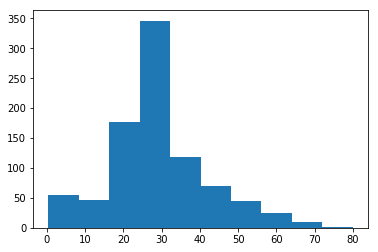

In [5]:
# Let us first study the ages of the passengers

age_array = np.array(train_plus.Age)
plt.hist(age_array)

C:\Users\Danny\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


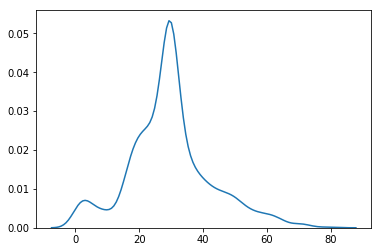

In [6]:
# Let us also do a kde plot

sns.kdeplot(data=age_array)

In [7]:
# Let us study if the ages differ for different gender

gender_group = train_plus.groupby(train_plus['Sex'])

In [8]:
gender_group.Age.mean()

Sex
female    28.216730
male      30.505824
Name: Age, dtype: float64

In [15]:
# Let us see if survival rates differ by gender

gender_surv = train_plus.groupby(train_plus.Sex)

gender_surv.mean()

,Survived,Pclass,Age,SibSp,Parch,Age_was_missing
Sex,,,,,,
female,0.742038,2.159236,28.216730,0.694268,0.649682,0.168790
male,0.188908,2.389948,30.505824,0.429809,0.235702,0.214905


In [17]:
# We can see females were much more likely to survive

def child(paa):
    age,sex=paa
    if age < 16:
        return 'child'
    else:
        return sex

train_plus['person']=train_plus[['Age','Sex']].apply(child,axis=1)

In [19]:
train_plus.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_was_missing,person
0,0,3,male,22.000000,1,0,S,False,male
1,1,1,female,38.000000,1,0,C,False,female
2,1,3,female,26.000000,0,0,S,False,female
3,1,1,female,35.000000,1,0,S,False,female
4,0,3,male,35.000000,0,0,S,False,male
5,0,3,male,29.699118,0,0,Q,True,male
6,0,1,male,54.000000,0,0,S,False,male
7,0,3,male,2.000000,3,1,S,False,child
8,1,3,female,27.000000,0,2,S,False,female
9,1,2,female,14.000000,1,0,C,False,child


In [21]:
person_group = train_plus.groupby(train_plus.person)

person_group.mean()

,Survived,Pclass,Age,SibSp,Parch,Age_was_missing
person,,,,,,
child,0.590361,2.626506,6.369518,1.734940,1.265060,0.000000
female,0.756458,2.084871,31.550012,0.601476,0.564576,0.195572
male,0.163873,2.372439,32.370932,0.296089,0.152700,0.230912


In [23]:
# We can see that now adult males were less likely to survive than the total number of males.
# Let us now drop the Sex column and use the person column instead

# Note that none of the childrens ages were missing! An improvement we might try later is when we
# replace the Nan by the mean we may want to exclude the childrens ages

train_plus.drop('Sex',axis =1,inplace=True)

train_plus.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked,Age_was_missing,person
0,0,3,22.0,1,0,S,False,male
1,1,1,38.0,1,0,C,False,female
2,1,3,26.0,0,0,S,False,female
3,1,1,35.0,1,0,S,False,female
4,0,3,35.0,0,0,S,False,male


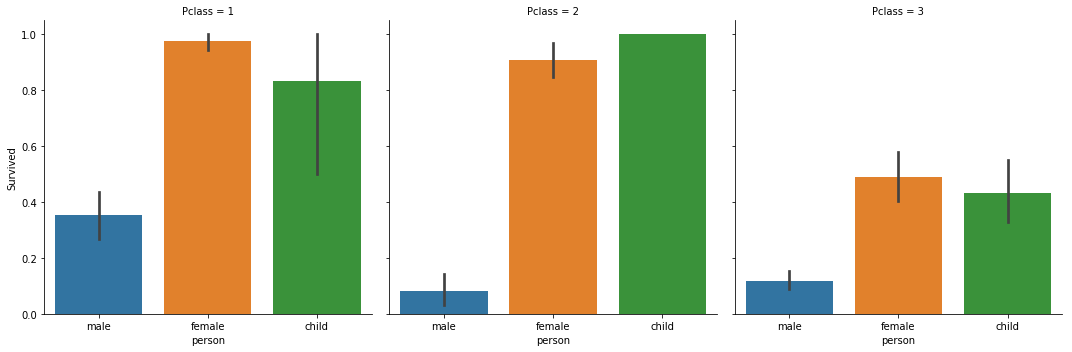

In [28]:
# Now let us look at survival rates of the person split into Pclass

sns.catplot(x='person',y='Survived',col='Pclass',data=train_plus,kind='bar')

In [29]:
# Women and children had a much better survival rate if they were in first or second class, not at
# all suprising

# All that is left to look at is: SibSP, Parch and Embarked. Let us first look at the embarked data

embarked_group = train_plus.groupby(train_plus.Embarked)

embarked_group.mean()

,Survived,Pclass,Age,SibSp,Parch,Age_was_missing
Embarked,,,,,,
C,0.553571,1.886905,30.562419,0.386905,0.363095,0.226190
Q,0.389610,2.909091,29.113724,0.428571,0.168831,0.636364
S,0.339009,2.346749,29.544382,0.569659,0.411765,0.139319


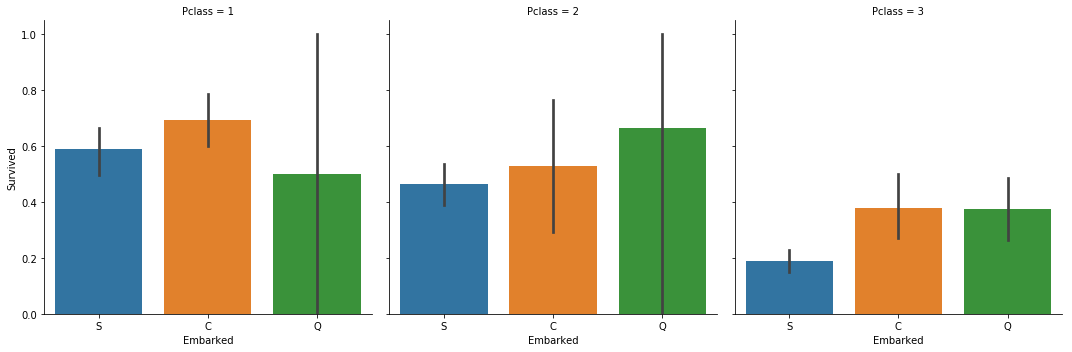

In [30]:
sns.catplot(x='Embarked',y='Survived',col='Pclass',data=train_plus,kind='bar')

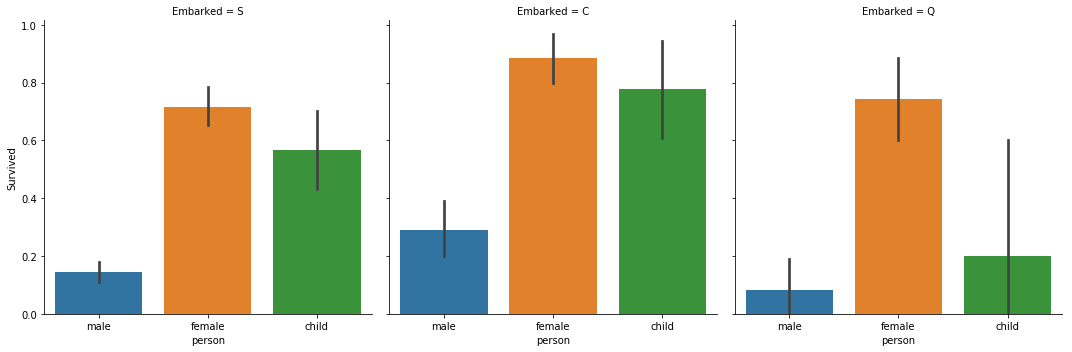

In [31]:
sns.catplot(x='person',y='Survived',col='Embarked',data=train_plus,kind='bar')

In [32]:
train_plus.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [33]:
# Most passengers embarked at S. The survival rates at the best at C irrespective of gender.
# Finally let us look at the data concerning family members

train_plus.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [34]:
train_plus.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [36]:
# We see most people travel without a sibling or spouse. Also most people travel without a parent
# or a child. Let us combine this and deal only with people who travelled alone.

def alone(ones):
    sib,par=ones
    if sib < 1 and par < 1:
        return 1
    else:
        return 0

train_plus['alone']=train_plus[['SibSp','Parch']].apply(alone,axis=1)

train_plus.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked,Age_was_missing,person,alone
0,0,3,22.0,1,0,S,False,male,0
1,1,1,38.0,1,0,C,False,female,0
2,1,3,26.0,0,0,S,False,female,1
3,1,1,35.0,1,0,S,False,female,0
4,0,3,35.0,0,0,S,False,male,1


In [37]:
train_plus.alone.value_counts()

1    537
0    354
Name: alone, dtype: int64

In [39]:
# Let us drop these two previous columns and just keep the alone

train_plus.drop(['SibSp','Parch'],axis=1,inplace=True)

train_plus.head()

,Survived,Pclass,Age,Embarked,Age_was_missing,person,alone
0,0,3,22.0,S,False,male,0
1,1,1,38.0,C,False,female,0
2,1,3,26.0,S,False,female,1
3,1,1,35.0,S,False,female,0
4,0,3,35.0,S,False,male,1


In [40]:
# Let us save the file and prepare it for the machine learning program in the next step

train_plus.to_csv('train_final.csv')